In [1]:
import pandas as pd

In [2]:
file = pd.read_csv('winequality-red.csv',sep=';')
df = file.copy()
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1482,7.2,0.58,0.54,2.1,0.114,3.0,9.0,0.99719,3.33,0.57,10.3,4
1489,6.2,0.57,0.10,2.1,0.048,4.0,11.0,0.99448,3.44,0.76,10.8,6
1142,6.9,0.45,0.11,2.4,0.043,6.0,12.0,0.99354,3.30,0.65,11.4,6
1080,10.3,0.27,0.56,1.4,0.047,3.0,8.0,0.99471,3.16,0.51,11.8,6
1373,7.7,0.75,0.27,3.8,0.110,34.0,89.0,0.99664,3.24,0.45,9.3,5
839,6.0,0.50,0.04,2.2,0.092,13.0,26.0,0.99647,3.46,0.47,10.0,5
156,7.1,0.43,0.42,5.5,0.070,29.0,129.0,0.99730,3.42,0.72,10.5,5
1099,8.6,0.52,0.38,1.5,0.096,5.0,18.0,0.99666,3.20,0.52,9.4,5
1060,11.6,0.23,0.57,1.8,0.074,3.0,8.0,0.99810,3.14,0.70,9.9,6
723,7.1,0.31,0.30,2.2,0.053,36.0,127.0,0.99650,2.94,1.62,9.5,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df['quality'].value_counts(ascending=False)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [6]:
q_list = df['quality'].to_list()
lst = []
for i in q_list :
        val = (i,q_list.count(i))
        lst.append(val)
q_list = list(set(lst))
q_list

[(6, 638), (3, 10), (7, 199), (5, 681), (4, 53), (8, 18)]

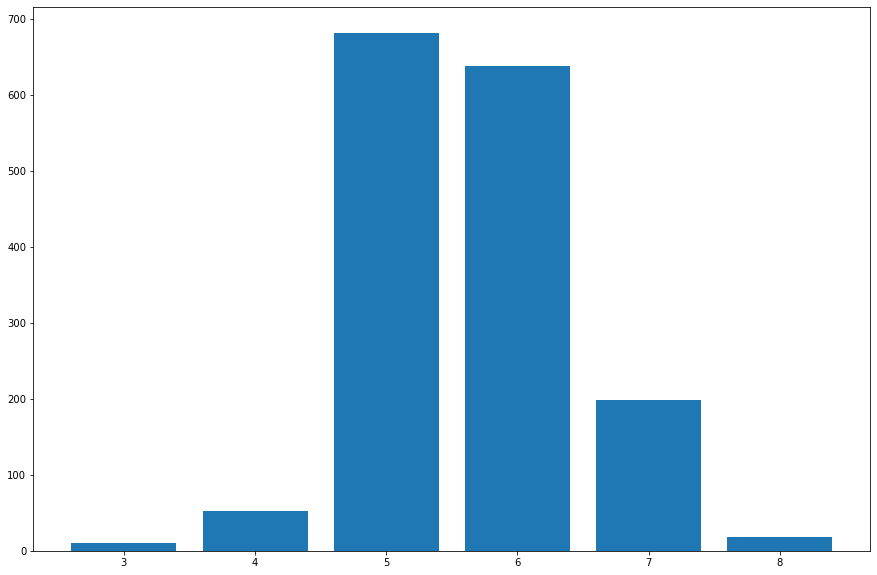

In [7]:
from matplotlib.pyplot import bar , show , figure
fig = figure(figsize=(15,10))
bar([i[0] for i in q_list],[i[1] for i in q_list])
show()

In [8]:
label = df['quality']
df = df.drop(['quality'],axis=1)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df[0:11]

array([[-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228,  0.04341614,  0.2238752 ,
         0.87263823,  0.62436323,  0.02826077, -0.7199333 ,  0.1289504 ,
        -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, -0.16942723,  0.09635286,
        -0.08366945,  0.22904665,  0.13426351, -0.33117661, -0.04808883,
        -0.58477711],
       [ 1.65485608, -1.38444349,  1.4841536 , -0.45321841, -0.26496041,
         0.10759209,  0.41150046,  0.6642772 , -0.97910442, -0.46118037,
        -0.58477711],
       [-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611],
       [-0.52835961,  0.73841761, -1.39147228, -0.5241662 , -0.26496041,
        -0.27493098, -0.19667889,  0.55827446,  1.28864292, -0.57920652,
        -0.960

In [10]:
from sklearn.model_selection import train_test_split 
xtr , xts , ytr , yts = train_test_split(scaled_df,label,test_size=0.2,random_state=42)

In [11]:
from sklearn.neural_network import MLPClassifier
alg = MLPClassifier(hidden_layer_sizes=550).fit(xtr,ytr)
alg.score(xtr,ytr)*100

C:\Users\pouria_z\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


81.00078186082878

In [12]:
alg.score(xts,yts)*100

65.3125

In [13]:
alg.score(scaled_df,label)*100

77.86116322701689